- a systematic change in a time series that does not appear to be periodic is known as a trend

Uses of identifying trend:
- knowledge of a trend or lack of a trend can suggest methods and make model selection and evaluation more efficient
- correct or remove the trend to simplify modeling and improve model performance
- use trend information, directly or as a summary, to provide additional information to the model and improve model performance.

Types of trends:
- Deterministic trend -> consistently inc or dec
- Stochastic trend -> inconsistently inc or dec


- global trend - whole time series
- local trend - part of time series

Specifically, a trend can be removed from your time series data (and data in the future) as a
data preparation and cleaning exercise. This is common when using statistical methods for time
series forecasting, but does not always improve results when using machine learning models.
Alternately, a trend can be added, either directly or as a summary, as a new input variable to
the supervised learning problem to predict the output variable.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

df = pd.read_csv("data/monthly-shampoo-sales.csv", header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
df.head()

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64

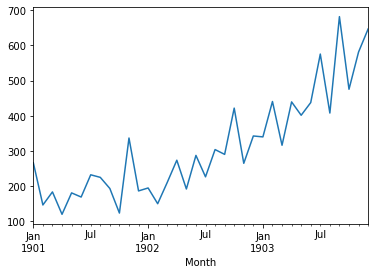

In [2]:
df.plot()
plt.show()

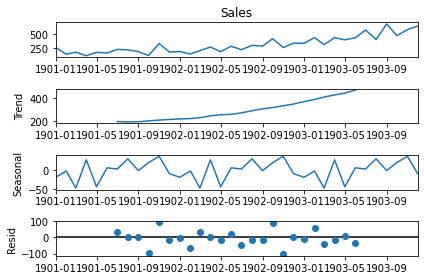

In [3]:
result = seasonal_decompose(df)
result.plot()
plt.show()

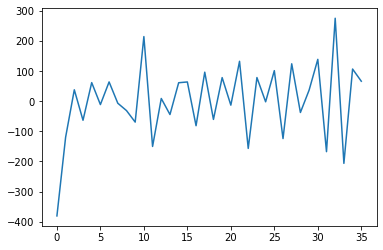

In [4]:
# detrend by differencing
X = df.values
diff = list()
for i in range(len(X)):
    value = X[i] - X[i-1]
    diff.append(value)

plt.plot(diff)
plt.show()

- works well for data with linear trend
- if trend is quadratic -> difference of already differenced dataset can be taken - second level differencing!
- Because differencing only requires the observation at the previous time step, it can easily be applied to unseen out-of-sample data to either pre-process or provide an additional input for supervised learning.

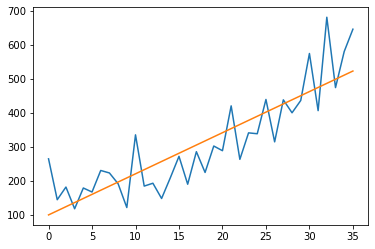

In [5]:
# detrending by model fit!
from sklearn.linear_model import LinearRegression
X = [i for i in range(0, len(df))]
X = np.reshape(X, (len(X), 1))
y = df.values
model = LinearRegression()
model.fit(X,y)
trend = model.predict(X)

plt.plot(y)
plt.plot(trend)
plt.show()

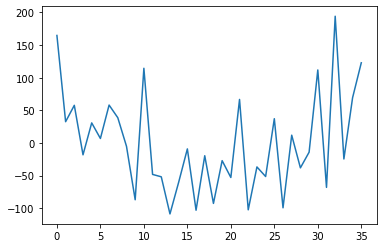

In [6]:
detrended = [y[i] - trend[i] for i in range(0, len(df))]
plt.plot(detrended)
plt.show()